In [1]:
import os
import pickle
import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


COLOR = 'k'
plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['xtick.major.size']  = 10 #12
plt.rcParams['ytick.major.size']  = 10 #12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 6
plt.rcParams['ytick.minor.size']  = 6

plt.rcParams['axes.linewidth'] = 3

plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'

parula=np.load('/Users/belugawhale/parula_colors.npy', allow_pickle=True)

In [2]:
line_table = Table.read('/Users/belugawhale/Documents/AUMic/aumic_linelist.csv',
                        format='csv', comment='#')
line_table = line_table[line_table['X-ray']==0]

dict_path = '/Users/belugawhale/Documents/AUMic/'
qdict = pd.read_pickle(os.path.join(dict_path, r'aumic_linelist_q.pkl'))
fdict = pd.read_pickle(os.path.join(dict_path, r'aumic_linelist_f.pkl'))

In [4]:
actual_keys = np.zeros(len(line_table), dtype='U10')
for i in range(len(line_table)):
    actual_keys[i] = ''.join(line_table['Ion'][i].split(' '))

/Users/belugawhale/opt/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:6852: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


Text(0, 0.5, 'Flare B Flux [x $10^{-15}$ erg / s / cm$^{-2}$]')

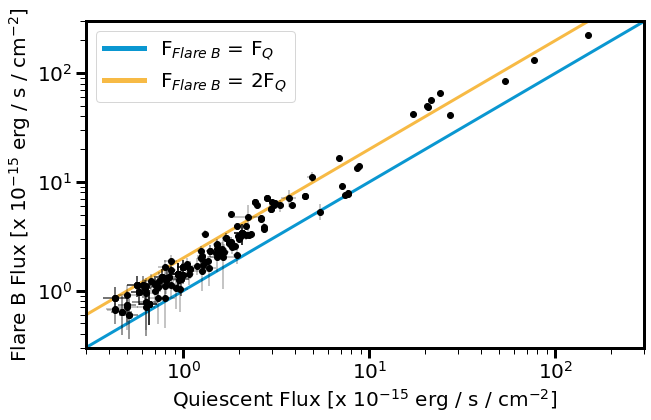

In [5]:
tab = Table(names=['\colhead{Ion}','\colhead{$\lambda_\textrm{rest}$ [\AA]}',
                   '\colhead{$\lambda_\textrm{obs}$ [\AA]}','\colhead{Velocity Shift [km s$^{-1}$]}',
                   '\colhead{Flux (Quiescent)}','\colhead{FWHM (Quiescent)}',
                   '\colhead{Flux (Flare B)}','\colhead{FWHM (Flare B)}'],
           dtype=['U10', np.float64, np.float64, np.float64, 'U20', 'U20', 'U20', 'U20'])

scale = 1e-15
qlines, flines = np.array([]), np.array([])

plt.figure(figsize=(10,6))
for i in range(len(line_table)):
    k = ''.join(line_table['Ion'][i].split(' '))
    wo = line_table[i]['wave_obs']+0.0
    try:
        if k != 'HeII' and k!='NII' and k!='OI':
            closest = np.argmin(np.abs(wo-qdict[k]['centers']))
            fq = np.round(qdict[k]['Fline'][closest]/scale,2)
            fqe= np.round(qdict[k]['FlineErr'][closest]/scale,2)

            fwhm_q = qdict[k]['sig'][closest]*2*np.sqrt(2*np.log(2))
            fwhm_qe= qdict[k]['sigErr'][closest]*2*np.sqrt(2*np.log(2))

            ff = np.round(fdict[k]['Fline'][closest]/scale,2)
            ffe= np.round(fdict[k]['FlineErr'][closest]/scale,2)
            if ffe>10:
                print(k)

            fwhm_f = fdict[k]['sig'][closest]*2*np.sqrt(2*np.log(2))
            fwhm_fe= fdict[k]['sigErr'][closest]*2*np.sqrt(2*np.log(2))

            plt.errorbar(fq, ff, c=COLOR,
                         yerr=ffe/np.log(10),
                         xerr=fqe/np.log(10),
                         alpha=0.3,
                         marker='',zorder=10)
            plt.errorbar(fq, ff, c=COLOR,                    
                         marker='o',zorder=10)
            
            qlines = np.append(qlines, fq)
            flines = np.append(flines, ff)

            tab.add_row([line_table['Ion'][i], 
                             np.round(line_table['Wavelength'][i],2),
                         np.round(line_table['wave_obs'][i],2),
                         np.round(line_table['velocity_offset'][i],2),
                         ' '.join(str(e) for e in [np.round(fq,2), '$\pm$', np.round(fqe,2)]),
                         ' '.join(str(e) for e in [np.round(fwhm_q,2), '$\pm$', np.round(fwhm_qe,2)]),
                         ' '.join(str(e) for e in [np.round(ff,2), '$\pm$', np.round(ffe,2)]),
                         ' '.join(str(e) for e in [np.round(fwhm_f,2), '$\pm$', np.round(fwhm_fe,2)])
                        ])
    except:
        pass
    #print(k, fq/scale, fqe/scale)
plt.plot(np.logspace(-3,300,10), np.logspace(-3,300,10), zorder=1, 
         color=parula[80], lw=3, label='F$_{Flare\;B}$ = F$_Q$')
plt.plot(np.logspace(-3,300,10), 2*np.logspace(-3,300,10), zorder=1, 
         color=parula[210], lw=3, label='F$_{Flare\;B}$ = 2F$_Q$')

lgd = plt.legend()
for handle in lgd.legendHandles:
    handle.set_linewidth(5)
    
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.3,300)
plt.ylim(0.3,300)
plt.xlabel('Quiescent Flux [x $10^{-15}$ erg / s / cm$^{-2}$]')
plt.ylabel('Flare B Flux [x $10^{-15}$ erg / s / cm$^{-2}$]')
#plt.savefig('/Users/belugawhale/Documents/AUMic/paper/table3.pdf',
#            rasterize=300, dpi=300, bbox_inches='tight')
#plt.savefig('/Users/belugawhale/Documents/GitHub/presentation-figures/aumic-flares/light-bkg/table3.png',
#            rasterize=300, dpi=300, bbox_inches='tight', transparent=True)

/var/folders/9s/jb487nv52hs8n0q5ftmb1lk80000gn/T/ipykernel_23423/2750791501.py:58: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/Users/belugawhale/Desktop/table3_rework.png',


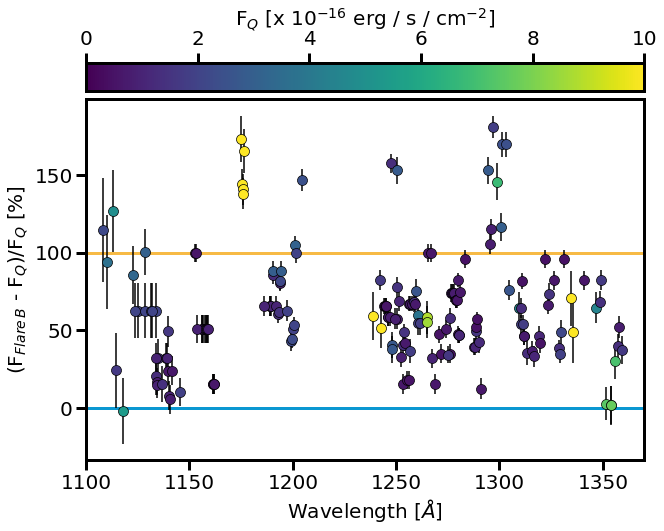

In [8]:
tab = Table(names=['\colhead{Ion}','\colhead{$\lambda_\textrm{rest}$ [\AA]}',
                   '\colhead{$\lambda_\textrm{obs}$ [\AA]}','\colhead{Velocity Shift [km s$^{-1}$]}',
                   '\colhead{Flux (Quiescent)}','\colhead{FWHM (Quiescent)}',
                   '\colhead{Flux (Flare B)}','\colhead{FWHM (Flare B)}'],
           dtype=['U10', np.float64, np.float64, np.float64, 'U20', 'U20', 'U20', 'U20'])

scale = 1e-15
qlines, flines = np.array([]), np.array([])
x=0
fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor('w')
for i in range(len(line_table)):
    k = ''.join(line_table['Ion'][i].split(' '))
    wo = line_table[i]['wave_obs']+0.0
    try:
        if k != 'HeII' and k!='NII' and k!='OI':
            closest = np.argmin(np.abs(wo-qdict[k]['centers']))
            fq = qdict[k]['Fline'][closest]
            fqe= qdict[k]['FlineErr'][closest]

            ff = fdict[k]['Fline'][closest]
            ffe= fdict[k]['FlineErr'][closest]
            if ffe>10:
                print(k)

            plt.errorbar(wo, (ff-fq)/fq*100, c=COLOR,
                         yerr=np.sqrt(ffe**2+fqe**2)/1e-16,
                         #xerr=fqe/np.log(10),
                         marker='o',zorder=10)
            im = plt.scatter(wo, (ff-fq)/fq*100, 
                            c=fq/1e-15, zorder=100,
                            marker='o', cmap='viridis',
                            vmin=0, vmax=10, s=100,
                            edgecolor='k', lw=0.7)
            
            qlines = np.append(qlines, fq)
            flines = np.append(flines, ff)
            x += 1

    except:
        pass
    #print(k, fq/scale, fqe/scale)
plt.plot(np.linspace(1000,1400,10), np.full(10, 0), 
         color=parula[80], lw=3, zorder=0)
plt.plot(np.linspace(1000,1400,10), np.full(10, 100),
         color=parula[210], lw=3, zorder=0)
#plt.plot(np.logspace(-3,300,10), 2*np.logspace(-3,300,10), zorder=1, 
#         color=parula[210], lw=3, label='F$_{Flare\;B}$ = 2F$_Q$')

plt.colorbar(im, orientation="horizontal", pad=0.02,  location='top',
             label='F$_Q$ [x $10^{-16}$ erg / s / cm$^{-2}$]')

plt.xlim(1100,1370)
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('(F$_{Flare\,B}$ - F$_Q$)/F$_Q$ [%]')
#plt.savefig('/Users/belugawhale/Documents/AUMic/paper/table3_rework.pdf',
#            rasterize=300, dpi=300, bbox_inches='tight')
plt.savefig('/Users/belugawhale/Desktop/table3_rework.png',
            rasterize=300, dpi=300, bbox_inches='tight')
#plt.savefig('/Users/belugawhale/Documents/GitHub/presentation-figures/aumic-flares/light-bkg/table3.png',
#            rasterize=300, dpi=300, bbox_inches='tight', transparent=True)